# Importerer alle programmer mm. der anvendes i skriptet.

In [121]:
import os                       # os tillader os bl.a. finder filplaceringer på computeren
import numpy as np              # Numpy leverer noget af matematikken, der ligger under Pandas 
import pandas as pd             # Pandas tillader os at importere, oprette og manipulere data frames
from pandas import DataFrame    # Nogle libraries har under-biblioteker. Underbiblioteker importeres med from-kommandoen
import matplotlib.pyplot as plt # så jeg kan lave grafer
from nltk.text import Text      # bruges til tekstanalyse
import glob                     # hjælper med paths og filnavne
import re
from collections import Counter
from afinn import Afinn
afinn = Afinn(language='da')

In [3]:
#!python -m  spacy download da_core_news_lg

In [4]:
import spacy
nlp = spacy.load("da_core_news_lg")

Åbne fil. Jeg bruger en mappe kaldet sagn, som indeholder flere tekster.

In [5]:
sagn = [] # opretter tom liste

for fil in os.scandir(r'.\sagn'): # for-loop
    with open (fil, encoding = "utf8") as f: # context manager
        sagn.append(f.read().replace("\n"," ").replace("*"," ")) # tilføj renset tekst til liste

In [6]:
sagn

['Sagn: Bispehøjen  Oversat fra færøsk af Anker Eli Petersen © 2005  originaltekst: Biskupsheygur Færøske Folkesagn og Æventyr Jakob Jakobsen, København 1898-1901    Rasmus Ganting, en præst fra Vágoy, var engang på vej til Sørvág sammen med sin karl. Stien går langs indsøen Leitisvatn, mellem Midvág og Sørvág, og tæt forbi en høj kaldet Biskupsheygur, tæt ved søen.    Da de skulle passere højen, stod den åben, og en kvinde stod i døren og inviterede præsten indenfor. En anden kvinde kom med øl i et sølvhorn og bød ham at drikke, men han blæste skummet af det, lige i fjæset på hende, før han drak. Da sagde hun    Du er en vis mand. Men præsten svarede, at hvis han ikke var mere lærd end hun, så ville han ikke være kommet.    De blev i højen hele dagen, og om aftenen blev en seng stillet til deres rådighed. Karlen var meget bange og kunne ikke sove, men præsten bad ham holde fast i sin fod og rykke i den, hvis han sov over sig.    Troldene sloges indbyrdes og beskyldte hinanden for at h

# Definerer rensefunktioner og afprøver

In [7]:
def rens_ord(sagn):
    text_1 = sagn.replace("\n"," ")
    text_2 = text_1.replace("."," ")
    text_3 = text_2.replace(","," ")
    text_4 = text_3.replace(":"," ")
    text_5 = text_4.replace("*"," ")
    text_6 = text_5.replace("–"," ")
    text_7 = text_6.replace("'"," ")
    text_8 = text_7.replace("”"," ")
    text_ren = text_8.replace("-"," ")
    text_lav = text_ren.lower()
    text_token = text_lav.split()
    return text_token                      

In [8]:
def rens_sæt(sagn):
    text_1 = sagn.replace("\n"," ")
    text_2 = text_1.replace(","," ")
    text_3 = text_2.replace(":"," ")
    text_4 = text_3.replace("*"," ")
    text_5 = text_4.replace("–"," ")
    text_6 = text_5.replace("'"," ")
    text_7 = text_6.replace("”"," ")
    text_ren = text_7.replace("-"," ")
    text_lav = text_ren.lower()
    text_token = text_lav.split(".")
    return text_token                      

In [9]:
renssagn = []
for s in sagn: 
    renssagn.append(rens_ord(s))

In [10]:
renssagn #Jeg har nu en ordliste, hvor alle ordene står skrevet med småt. 

[['sagn',
  'bispehøjen',
  'oversat',
  'fra',
  'færøsk',
  'af',
  'anker',
  'eli',
  'petersen',
  '©',
  '2005',
  'originaltekst',
  'biskupsheygur',
  'færøske',
  'folkesagn',
  'og',
  'æventyr',
  'jakob',
  'jakobsen',
  'københavn',
  '1898',
  '1901',
  'rasmus',
  'ganting',
  'en',
  'præst',
  'fra',
  'vágoy',
  'var',
  'engang',
  'på',
  'vej',
  'til',
  'sørvág',
  'sammen',
  'med',
  'sin',
  'karl',
  'stien',
  'går',
  'langs',
  'indsøen',
  'leitisvatn',
  'mellem',
  'midvág',
  'og',
  'sørvág',
  'og',
  'tæt',
  'forbi',
  'en',
  'høj',
  'kaldet',
  'biskupsheygur',
  'tæt',
  'ved',
  'søen',
  'da',
  'de',
  'skulle',
  'passere',
  'højen',
  'stod',
  'den',
  'åben',
  'og',
  'en',
  'kvinde',
  'stod',
  'i',
  'døren',
  'og',
  'inviterede',
  'præsten',
  'indenfor',
  'en',
  'anden',
  'kvinde',
  'kom',
  'med',
  'øl',
  'i',
  'et',
  'sølvhorn',
  'og',
  'bød',
  'ham',
  'at',
  'drikke',
  'men',
  'han',
  'blæste',
  'skummet',


# Dataframe

In [11]:
titler = ["Bispehøjen", "Bryllup i Stapi", "Dværge", "Femte, Sakaris og strandtroldene i Hattarvík", "Havfrue", "Havkvæg og huldekvæg", "Huldebarnet", "Huldekvindens barsel", "Huldemanden i Guldstenen", "Huldemanden og fårehyrden", "Huldemanden under liðastein", "Klog Marjun og vætterne", "Manden i huldebåden", "Maren", "Marmennill", "Niðagrísur i gamachen", "Niðagrísur og præsten i Ónagerði", "Niðagrísur", "Nøkken fra Eiði", "Nøkken i Leitisvatn", "Nøkken", "Nøkken2", "Pálin undir Hamri", "Pukrhuset", "Símun í Kirkjubø", "Sælkvinden fra Skálavík", "Sælkvinden", "Títil-Tátá", "Troldene på Skálavøllum", "Troldenæs", "Vætterne i Skáli"] 

In [12]:
df_sagn = pd.DataFrame ({"Titler": titler, "Sagn": sagn,})

In [13]:
df_sagn

,Titler,Sagn
0,Bispehøjen,Sagn: Bispehøjen Oversat fra færøsk af Anker ...
1,Bryllup i Stapi,Sagn: Brylluppet i Stapi Oversat fra færøsk a...
2,Dværge,Sagn: Dværge Oversat fra færøsk af Anker Eli ...
3,"Femte, Sakaris og strandtroldene i Hattarvík","Sagn: Femte, Sakaris og strandtroldene i Hatta..."
4,Havfrue,Sagn: Havfrue Oversat fra færøsk af Anker Eli...
5,Havkvæg og huldekvæg,Sagn: Havkvæg og huldekvæg Oversat fra færøsk...
6,Huldebarnet,Sagn: Huldebarnet (Skiftingen) Oversat fra fæ...
7,Huldekvindens barsel,Sagn: Huldekvindens barsel Oversat fra færøsk...
8,Huldemanden i Guldstenen,Sagn: Huldemanden i Guldstenen Oversat fra fæ...
9,Huldemanden og fårehyrden,Sagn: Huldemanden og fårehyrden Oversat fra f...


In [14]:
df_sagn["renTxtOrd"] = df_sagn.Sagn.apply(rens_ord)

In [15]:
df_sagn["antalOrd"] = df_sagn.renTxtOrd.apply(len)

In [16]:
df_sagn

,Titler,Sagn,renTxtOrd,antalOrd
0,Bispehøjen,Sagn: Bispehøjen Oversat fra færøsk af Anker ...,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",279
1,Bryllup i Stapi,Sagn: Brylluppet i Stapi Oversat fra færøsk a...,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",1207
2,Dværge,Sagn: Dværge Oversat fra færøsk af Anker Eli ...,"[sagn, dværge, oversat, fra, færøsk, af, anker...",296
3,"Femte, Sakaris og strandtroldene i Hattarvík","Sagn: Femte, Sakaris og strandtroldene i Hatta...","[sagn, femte, sakaris, og, strandtroldene, i, ...",743
4,Havfrue,Sagn: Havfrue Oversat fra færøsk af Anker Eli...,"[sagn, havfrue, oversat, fra, færøsk, af, anke...",138
5,Havkvæg og huldekvæg,Sagn: Havkvæg og huldekvæg Oversat fra færøsk...,"[sagn, havkvæg, og, huldekvæg, oversat, fra, f...",216
6,Huldebarnet,Sagn: Huldebarnet (Skiftingen) Oversat fra fæ...,"[sagn, huldebarnet, (skiftingen), oversat, fra...",468
7,Huldekvindens barsel,Sagn: Huldekvindens barsel Oversat fra færøsk...,"[sagn, huldekvindens, barsel, oversat, fra, fæ...",274
8,Huldemanden i Guldstenen,Sagn: Huldemanden i Guldstenen Oversat fra fæ...,"[sagn, huldemanden, i, guldstenen, oversat, fr...",222
9,Huldemanden og fårehyrden,Sagn: Huldemanden og fårehyrden Oversat fra f...,"[sagn, huldemanden, og, fårehyrden, oversat, f...",285


In [17]:
df_sagn["renTxtSæt"] = [rens_sæt(txt) for txt in df_sagn["Sagn"]]

In [18]:
df_sagn["antalSæt"] = [len(txt) for txt in df_sagn["renTxtSæt"]]

In [19]:
df_sagn["antalTegn"] = [len(txt) for txt in df_sagn["Sagn"]]

In [20]:
df_sagn

,Titler,Sagn,renTxtOrd,antalOrd,renTxtSæt,antalSæt,antalTegn
0,Bispehøjen,Sagn: Bispehøjen Oversat fra færøsk af Anker ...,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",279,[sagn bispehøjen oversat fra færøsk af anker...,16,1536
1,Bryllup i Stapi,Sagn: Brylluppet i Stapi Oversat fra færøsk a...,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",1207,[sagn brylluppet i stapi oversat fra færøsk ...,71,6565
2,Dværge,Sagn: Dværge Oversat fra færøsk af Anker Eli ...,"[sagn, dværge, oversat, fra, færøsk, af, anker...",296,[sagn dværge oversat fra færøsk af anker eli...,23,1587
3,"Femte, Sakaris og strandtroldene i Hattarvík","Sagn: Femte, Sakaris og strandtroldene i Hatta...","[sagn, femte, sakaris, og, strandtroldene, i, ...",743,[sagn femte sakaris og strandtroldene i hatt...,38,4054
4,Havfrue,Sagn: Havfrue Oversat fra færøsk af Anker Eli...,"[sagn, havfrue, oversat, fra, færøsk, af, anke...",138,[sagn havfrue oversat fra færøsk af anker el...,9,786
5,Havkvæg og huldekvæg,Sagn: Havkvæg og huldekvæg Oversat fra færøsk...,"[sagn, havkvæg, og, huldekvæg, oversat, fra, f...",216,[sagn havkvæg og huldekvæg oversat fra færøs...,15,1277
6,Huldebarnet,Sagn: Huldebarnet (Skiftingen) Oversat fra fæ...,"[sagn, huldebarnet, (skiftingen), oversat, fra...",468,[sagn huldebarnet (skiftingen) oversat fra f...,28,2650
7,Huldekvindens barsel,Sagn: Huldekvindens barsel Oversat fra færøsk...,"[sagn, huldekvindens, barsel, oversat, fra, fæ...",274,[sagn huldekvindens barsel oversat fra færøs...,16,1508
8,Huldemanden i Guldstenen,Sagn: Huldemanden i Guldstenen Oversat fra fæ...,"[sagn, huldemanden, i, guldstenen, oversat, fr...",222,[sagn huldemanden i guldstenen oversat fra f...,11,1250
9,Huldemanden og fårehyrden,Sagn: Huldemanden og fårehyrden Oversat fra f...,"[sagn, huldemanden, og, fårehyrden, oversat, f...",285,[sagn huldemanden og fårehyrden oversat fra ...,14,1591


In [23]:
df_sagn.describe()

,antalOrd,antalSæt,antalTegn
count,31.000000,31.000000,31.000000
mean,393.612903,21.903226,2183.161290
std,335.708969,17.675510,1818.277502
min,138.000000,7.000000,781.000000
25%,221.500000,12.000000,1240.000000
50%,296.000000,16.000000,1591.000000
75%,399.000000,23.000000,2329.000000
max,1690.000000,85.000000,9202.000000


In [24]:
df_sagn["gnmSætLæng"] = df_sagn["antalOrd"]/df_sagn["antalSæt"]

In [27]:
df_sagn

,Titler,Sagn,renTxtOrd,antalOrd,renTxtSæt,antalSæt,antalTegn,ordliste,gnmSætLæng
0,Bispehøjen,Sagn: Bispehøjen Oversat fra færøsk af Anker ...,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",279,[sagn bispehøjen oversat fra færøsk af anker...,16,1536,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",17.437500
1,Bryllup i Stapi,Sagn: Brylluppet i Stapi Oversat fra færøsk a...,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",1207,[sagn brylluppet i stapi oversat fra færøsk ...,71,6565,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",17.000000
2,Dværge,Sagn: Dværge Oversat fra færøsk af Anker Eli ...,"[sagn, dværge, oversat, fra, færøsk, af, anker...",296,[sagn dværge oversat fra færøsk af anker eli...,23,1587,"[sagn, dværge, oversat, fra, færøsk, af, anker...",12.869565
3,"Femte, Sakaris og strandtroldene i Hattarvík","Sagn: Femte, Sakaris og strandtroldene i Hatta...","[sagn, femte, sakaris, og, strandtroldene, i, ...",743,[sagn femte sakaris og strandtroldene i hatt...,38,4054,"[sagn, femte, sakaris, og, strandtroldene, i, ...",19.552632
4,Havfrue,Sagn: Havfrue Oversat fra færøsk af Anker Eli...,"[sagn, havfrue, oversat, fra, færøsk, af, anke...",138,[sagn havfrue oversat fra færøsk af anker el...,9,786,"[sagn, havfrue, oversat, fra, færøsk, af, anke...",15.333333
5,Havkvæg og huldekvæg,Sagn: Havkvæg og huldekvæg Oversat fra færøsk...,"[sagn, havkvæg, og, huldekvæg, oversat, fra, f...",216,[sagn havkvæg og huldekvæg oversat fra færøs...,15,1277,"[sagn, havkvæg, og, huldekvæg, oversat, fra, f...",14.400000
6,Huldebarnet,Sagn: Huldebarnet (Skiftingen) Oversat fra fæ...,"[sagn, huldebarnet, (skiftingen), oversat, fra...",468,[sagn huldebarnet (skiftingen) oversat fra f...,28,2650,"[sagn, huldebarnet, (skiftingen), oversat, fra...",16.714286
7,Huldekvindens barsel,Sagn: Huldekvindens barsel Oversat fra færøsk...,"[sagn, huldekvindens, barsel, oversat, fra, fæ...",274,[sagn huldekvindens barsel oversat fra færøs...,16,1508,"[sagn, huldekvindens, barsel, oversat, fra, fæ...",17.125000
8,Huldemanden i Guldstenen,Sagn: Huldemanden i Guldstenen Oversat fra fæ...,"[sagn, huldemanden, i, guldstenen, oversat, fr...",222,[sagn huldemanden i guldstenen oversat fra f...,11,1250,"[sagn, huldemanden, i, guldstenen, oversat, fr...",20.181818
9,Huldemanden og fårehyrden,Sagn: Huldemanden og fårehyrden Oversat fra f...,"[sagn, huldemanden, og, fårehyrden, oversat, f...",285,[sagn huldemanden og fårehyrden oversat fra ...,14,1591,"[sagn, huldemanden, og, fårehyrden, oversat, f...",20.357143


In [25]:
df_sagn.to_csv("sagn_datasæt_renset.csv", index=False)

In [26]:
df_sagn.to_csv

<bound method NDFrame.to_csv of                                           Titler  \
0                                     Bispehøjen   
1                                Bryllup i Stapi   
2                                         Dværge   
3   Femte, Sakaris og strandtroldene i Hattarvík   
4                                        Havfrue   
5                           Havkvæg og huldekvæg   
6                                    Huldebarnet   
7                           Huldekvindens barsel   
8                       Huldemanden i Guldstenen   
9                      Huldemanden og fårehyrden   
10                   Huldemanden under liðastein   
11                       Klog Marjun og vætterne   
12                           Manden i huldebåden   
13                                         Maren   
14                                    Marmennill   
15                         Niðagrísur i gamachen   
16              Niðagrísur og præsten i Ónagerði   
17                              

# Counter

In [107]:
sagnforanalyse = 1 #Jeg softcoder. For at anvende skriptet så ænder tallet i denne. 

In [42]:
def freq(Lines, str):
    words = Lines.split()
    words_list = []
    for i in words:
        if str in i:
            words_list.append(sagn)
    return(len(words_list))

In [98]:
TroldeCounter = {"Trold":freq(sagn[sagnforanalyse],"Trold"),"trold":freq(sagn[sagnforanalyse],"trold"), "Trolde":freq(sagn[sagnforanalyse],"Trolde"), "trolde":freq(sagn[sagnforanalyse],"trolde"),"Trolden":freq(sagn[sagnforanalyse],"Trolden"), "trolden":freq(sagn[sagnforanalyse],"trolden"),"Troldene":freq(sagn[sagnforanalyse],"Troldene"),"troldene":freq(sagn[sagnforanalyse],"troldene"), "Troldens":freq(sagn[sagnforanalyse],"Troldens"), "troldens":freq(sagn[sagnforanalyse],"troldens"), "Troldenes":freq(sagn[sagnforanalyse],"Troldenes"), "troldenes":freq(sagn[sagnforanalyse],"troldenes")}

In [99]:
TroldeCounter

{'Trold': 0,
 'trold': 1,
 'Trolde': 0,
 'trolde': 0,
 'Trolden': 0,
 'trolden': 0,
 'Troldene': 0,
 'troldene': 0,
 'Troldens': 0,
 'troldens': 0,
 'Troldenes': 0,
 'troldenes': 0}

In [58]:
sum(TroldeCounter.values())

4

In [71]:
HavCounter = {"Havfrue":freq(sagn[sagnforanalyse],"Havfrue"),"havfrue":freq(sagn[sagnforanalyse],"havfrue"),"Havfruen":freq(sagn[sagnforanalyse],"Havfruen"), "havfruen":freq(sagn[sagnforanalyse],"havfrue"),"Havfruerne":freq(sagn[sagnforanalyse],"Havfruerne"),"havfruerne":freq(sagn[sagnforanalyse],"havfruerne"), "Havfruens":freq(sagn[sagnforanalyse],"Havfruens"), "havfruens":freq(sagn[sagnforanalyse],"havfruens"), "Havfruernes":freq(sagn[sagnforanalyse],"Havfruernes"), "havfruernes":freq(sagn[sagnforanalyse],"havfruernes")}

In [72]:
HavCounter

{'Havfrue': 0,
 'havfrue': 0,
 'Havfruen': 0,
 'havfruen': 0,
 'Havfruerne': 0,
 'havfruerne': 0,
 'Havfruens': 0,
 'havfruens': 0,
 'Havfruernes': 0,
 'havfruernes': 0}

In [73]:
sum(HavCounter.values())

0

In [74]:
SirCounter = {"Sirene":freq(sagn[sagnforanalyse],"Sirene"),"sirene":freq(sagn[sagnforanalyse],"sirene"),"Sirenen":freq(sagn[sagnforanalyse],"Sirenen"), "sirenen":freq(sagn[sagnforanalyse],"sirenen"),"Sirenerne":freq(sagn[sagnforanalyse],"Sirenerne"),"sirenerne":freq(sagn[sagnforanalyse],"sirenerne"), "Sirenens":freq(sagn[sagnforanalyse],"Sirenens"), "sirenens":freq(sagn[sagnforanalyse],"sirenens"), "Sirenernes":freq(sagn[sagnforanalyse],"Sirenernes"), "sirenernes":freq(sagn[sagnforanalyse],"sirenernes")}

In [75]:
SirCounter

{'Sirene': 0,
 'sirene': 0,
 'Sirenen': 0,
 'sirenen': 0,
 'Sirenerne': 0,
 'sirenerne': 0,
 'Sirenens': 0,
 'sirenens': 0,
 'Sirenernes': 0,
 'sirenernes': 0}

In [76]:
sum(SirCounter.values())

0

In [77]:
NøkCounter = {"Nøkke":freq(sagn[sagnforanalyse],"Nøkke"),"nøkke":freq(sagn[sagnforanalyse],"nøkke"),"Nøkken":freq(sagn[sagnforanalyse],"Nøkken"), "nøkken":freq(sagn[sagnforanalyse],"nøkken"),"Nøkkene":freq(sagn[sagnforanalyse],"Nøkkene"), "nøkkene":freq(sagn[sagnforanalyse],"nøkkene"), "Nøkkens":freq(sagn[sagnforanalyse],"Nøkkens"), "nøkkens":freq(sagn[sagnforanalyse],"nøkkens"), "Nøkkenes":freq(sagn[sagnforanalyse],"Nøkkenes"), "nøkkenes":freq(sagn[sagnforanalyse],"nøkkenes")}

In [78]:
NøkCounter

{'Nøkke': 0,
 'nøkke': 0,
 'Nøkken': 0,
 'nøkken': 0,
 'Nøkkene': 0,
 'nøkkene': 0,
 'Nøkkens': 0,
 'nøkkens': 0,
 'Nøkkenes': 0,
 'nøkkenes': 0}

In [79]:
sum(NøkCounter.values())

0

In [84]:
DvæCounter = {"Dværg":freq(sagn[sagnforanalyse],"Dværg"),"dværg":freq(sagn[sagnforanalyse],"dværg"), "Dværge":freq(sagn[sagnforanalyse],"Dværge"), "dværge":freq(sagn[sagnforanalyse],"dværge"),"Dværgen":freq(sagn[sagnforanalyse],"Dværgen"), "dværgen":freq(sagn[sagnforanalyse],"dværgen"),"Dværgene":freq(sagn[sagnforanalyse],"Dværgene"),"dværgene":freq(sagn[sagnforanalyse],"dværgene"), "Dværgens":freq(sagn[sagnforanalyse],"Dværgens"), "dværgens":freq(sagn[sagnforanalyse], "dværgens"), "Dværgenes":freq(sagn[sagnforanalyse],"Dværgenes"), "dværgenes":freq(sagn[sagnforanalyse],"dværgenes")}

In [85]:
DvæCounter

{'Dværg': 0,
 'dværg': 0,
 'Dværge': 0,
 'dværge': 0,
 'Dværgen': 0,
 'dværgen': 0,
 'Dværgene': 0,
 'dværgene': 0,
 'Dværgens': 0,
 'dværgens': 0,
 'Dværgenes': 0,
 'dværgenes': 0}

In [86]:
sum(DvæCounter.values())

0

In [104]:
HuldCounter = {"Hulde":freq(sagn[sagnforanalyse],"Hulde"),"hulde":freq(sagn[sagnforanalyse],"hulde"), "Huldekone":freq(sagn[sagnforanalyse],"Huldekone"), "huldekone":freq(sagn[sagnforanalyse],"huldekone"), "Huldemand":freq(sagn[sagnforanalyse],"Huldemand"),"huldemand":freq(sagn[sagnforanalyse],"huldemand"), "Huldre":freq(sagn[sagnforanalyse],"Huldre"), "huldre":freq(sagn[sagnforanalyse],"huldre"), "Huldrer":freq(sagn[sagnforanalyse],"Huldrer"),"huldrer":freq(sagn[sagnforanalyse],"huldrer"), "Huldekoner":freq(sagn[sagnforanalyse],"Huldekoner"),"huldekoner":freq(sagn[sagnforanalyse],"huldekoner"), "Huldemænd":freq(sagn[sagnforanalyse],"Huldemænd"),"huldemænd":freq(sagn[sagnforanalyse],"huldemænd"), "Huldens":freq(sagn[sagnforanalyse],"Huldens"),"huldens":freq(sagn[sagnforanalyse],"Huldens"), "Huldekonens":freq(sagn[sagnforanalyse],"Huldekonens"),"huldekonens":freq(sagn[sagnforanalyse],"huldekonens"), "Huldemandens":freq(sagn[sagnforanalyse],"Huldemandens"),"huldemandens":freq(sagn[sagnforanalyse],"huldemandens"), "Hulde":freq(sagn[sagnforanalyse],"Hulde"),"hulde":freq(sagn[sagnforanalyse],"hulde"),"Huldene":freq(sagn[sagnforanalyse],"Huldene"), "huldene":freq(sagn[sagnforanalyse],"huldene"),"Huldrene":freq(sagn[sagnforanalyse],"Huldrene"),"huldrene":freq(sagn[sagnforanalyse],"huldrene"), "Huldenes":freq(sagn[sagnforanalyse],"Huldenes"), "huldenes":freq(sagn[sagnforanalyse], "huldenes"), "Huldrenes":freq(sagn[sagnforanalyse],"Huldrenes"), "huldrenes":freq(sagn[sagnforanalyse],"huldrenes"), "Huldernes":freq(sagn[sagnforanalyse],"Huldernes"), "huldernes":freq(sagn[sagnforanalyse],"huldernes"), "Huldrernes":freq(sagn[sagnforanalyse],"Huldrernes"), "huldrernes":freq(sagn[sagnforanalyse],"huldrernes")}

In [105]:
HuldCounter

{'Hulde': 2,
 'hulde': 19,
 'Huldekone': 1,
 'huldekone': 4,
 'Huldemand': 0,
 'huldemand': 4,
 'Huldre': 0,
 'huldre': 0,
 'Huldrer': 0,
 'huldrer': 0,
 'Huldekoner': 0,
 'huldekoner': 0,
 'Huldemænd': 0,
 'huldemænd': 0,
 'Huldens': 0,
 'huldens': 0,
 'Huldekonens': 1,
 'huldekonens': 0,
 'Huldemandens': 0,
 'huldemandens': 0,
 'Huldene': 0,
 'huldene': 0,
 'Huldrene': 0,
 'huldrene': 0,
 'Huldenes': 0,
 'huldenes': 0,
 'Huldrenes': 0,
 'huldrenes': 0,
 'Huldernes': 0,
 'huldernes': 0,
 'Huldrernes': 0,
 'huldrernes': 0}

In [106]:
sum(HuldCounter.values())

31

# Sentiment analyse 

In [109]:
def find_ord(txt):
    x = []
    y = list(txt.sents)
    for s in y:          #for hver sætning i listen y                 
        for w in s:      #for hvert ord i sætningen
            if w.pos_ == "ADJ" or w.pos_ == "NOUN": #finder adjektiver og substantiver
                x.append(w.text)
    return sorted(set(x))        #returnerer sættet sorteret alfabetisk. hvis man sletter set så får man dubletter

In [115]:
df_sagn["nlp_Tekst"] = df_sagn.Sagn.apply(nlp)


In [116]:
df_sagn

,Titler,Sagn,renTxtOrd,antalOrd,renTxtSæt,antalSæt,antalTegn,ordliste,gnmSætLæng,nlp_Tekst
0,Bispehøjen,Sagn: Bispehøjen Oversat fra færøsk af Anker ...,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",279,[sagn bispehøjen oversat fra færøsk af anker...,16,1536,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",17.437500,"(Sagn, :, Bispehøjen, , Oversat, fra, færøsk,..."
1,Bryllup i Stapi,Sagn: Brylluppet i Stapi Oversat fra færøsk a...,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",1207,[sagn brylluppet i stapi oversat fra færøsk ...,71,6565,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",17.000000,"(Sagn, :, Brylluppet, i, Stapi, , Oversat, fr..."
2,Dværge,Sagn: Dværge Oversat fra færøsk af Anker Eli ...,"[sagn, dværge, oversat, fra, færøsk, af, anker...",296,[sagn dværge oversat fra færøsk af anker eli...,23,1587,"[sagn, dværge, oversat, fra, færøsk, af, anker...",12.869565,"(Sagn, :, Dværge, , Oversat, fra, færøsk, af,..."
3,"Femte, Sakaris og strandtroldene i Hattarvík","Sagn: Femte, Sakaris og strandtroldene i Hatta...","[sagn, femte, sakaris, og, strandtroldene, i, ...",743,[sagn femte sakaris og strandtroldene i hatt...,38,4054,"[sagn, femte, sakaris, og, strandtroldene, i, ...",19.552632,"(Sagn, :, Femte, ,, Sakaris, og, strandtrolden..."
4,Havfrue,Sagn: Havfrue Oversat fra færøsk af Anker Eli...,"[sagn, havfrue, oversat, fra, færøsk, af, anke...",138,[sagn havfrue oversat fra færøsk af anker el...,9,786,"[sagn, havfrue, oversat, fra, færøsk, af, anke...",15.333333,"(Sagn, :, Havfrue, , Oversat, fra, færøsk, af..."
5,Havkvæg og huldekvæg,Sagn: Havkvæg og huldekvæg Oversat fra færøsk...,"[sagn, havkvæg, og, huldekvæg, oversat, fra, f...",216,[sagn havkvæg og huldekvæg oversat fra færøs...,15,1277,"[sagn, havkvæg, og, huldekvæg, oversat, fra, f...",14.400000,"(Sagn, :, Havkvæg, og, huldekvæg, , Oversat, ..."
6,Huldebarnet,Sagn: Huldebarnet (Skiftingen) Oversat fra fæ...,"[sagn, huldebarnet, (skiftingen), oversat, fra...",468,[sagn huldebarnet (skiftingen) oversat fra f...,28,2650,"[sagn, huldebarnet, (skiftingen), oversat, fra...",16.714286,"(Sagn, :, Huldebarnet, (, Skiftingen, ), , Ov..."
7,Huldekvindens barsel,Sagn: Huldekvindens barsel Oversat fra færøsk...,"[sagn, huldekvindens, barsel, oversat, fra, fæ...",274,[sagn huldekvindens barsel oversat fra færøs...,16,1508,"[sagn, huldekvindens, barsel, oversat, fra, fæ...",17.125000,"(Sagn, :, Huldekvindens, barsel, , Oversat, f..."
8,Huldemanden i Guldstenen,Sagn: Huldemanden i Guldstenen Oversat fra fæ...,"[sagn, huldemanden, i, guldstenen, oversat, fr...",222,[sagn huldemanden i guldstenen oversat fra f...,11,1250,"[sagn, huldemanden, i, guldstenen, oversat, fr...",20.181818,"(Sagn, :, Huldemanden, i, Guldstenen, , Overs..."
9,Huldemanden og fårehyrden,Sagn: Huldemanden og fårehyrden Oversat fra f...,"[sagn, huldemanden, og, fårehyrden, oversat, f...",285,[sagn huldemanden og fårehyrden oversat fra ...,14,1591,"[sagn, huldemanden, og, fårehyrden, oversat, f...",20.357143,"(Sagn, :, Huldemanden, og, fårehyrden, , Over..."


In [118]:
df_sagn["Subst_adj"] = df_sagn.nlp_Tekst.apply(find_ord)

In [119]:
def streng(lst): #(lst) er intern i funktionen. 
    return " ".join(lst) #vi tager alle elementerne fra den liste, som er enkelte strenge og joiner dem til en liste.
#resulterer i én lang string i stedet for liste med enkelte strings. 

In [120]:
df_sagn["Subst_adj_streng"] = df_sagn.Subst_adj.apply(streng)
df_sagn.head(3)

,Titler,Sagn,renTxtOrd,antalOrd,renTxtSæt,antalSæt,antalTegn,ordliste,gnmSætLæng,nlp_Tekst,Subst_adj,Subst_adj_streng
0,Bispehøjen,Sagn: Bispehøjen Oversat fra færøsk af Anker ...,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",279,[sagn bispehøjen oversat fra færøsk af anker...,16,1536,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",17.437500,"(Sagn, :, Bispehøjen, , Oversat, fra, færøsk,...","[Daggryet, Folkesagn, Færøske, Karlen, Oversat...",Daggryet Folkesagn Færøske Karlen Oversat Sagn...
1,Bryllup i Stapi,Sagn: Brylluppet i Stapi Oversat fra færøsk a...,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",1207,[sagn brylluppet i stapi oversat fra færøsk ...,71,6565,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",17.000000,"(Sagn, :, Brylluppet, i, Stapi, , Oversat, fr...","[Brylluppet, Datteren, Datterens, Folkesagn, F...",Brylluppet Datteren Datterens Folkesagn Færøsk...
2,Dværge,Sagn: Dværge Oversat fra færøsk af Anker Eli ...,"[sagn, dværge, oversat, fra, færøsk, af, anker...",296,[sagn dværge oversat fra færøsk af anker eli...,23,1587,"[sagn, dværge, oversat, fra, færøsk, af, anker...",12.869565,"(Sagn, :, Dværge, , Oversat, fra, færøsk, af,...","[Antiquarisk, Dværge, Dværgene, Dværgenes, Dvø...",Antiquarisk Dværge Dværgene Dværgenes Dvørgar ...


In [122]:
df_sagn["Sentiment_score"] = df_sagn.Subst_adj_streng.apply(afinn.score)

In [123]:
df_sagn

,Titler,Sagn,renTxtOrd,antalOrd,renTxtSæt,antalSæt,antalTegn,ordliste,gnmSætLæng,nlp_Tekst,Subst_adj,Subst_adj_streng,Sentiment_score
0,Bispehøjen,Sagn: Bispehøjen Oversat fra færøsk af Anker ...,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",279,[sagn bispehøjen oversat fra færøsk af anker...,16,1536,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",17.437500,"(Sagn, :, Bispehøjen, , Oversat, fra, færøsk,...","[Daggryet, Folkesagn, Færøske, Karlen, Oversat...",Daggryet Folkesagn Færøske Karlen Oversat Sagn...,-4.0
1,Bryllup i Stapi,Sagn: Brylluppet i Stapi Oversat fra færøsk a...,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",1207,[sagn brylluppet i stapi oversat fra færøsk ...,71,6565,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",17.000000,"(Sagn, :, Brylluppet, i, Stapi, , Oversat, fr...","[Brylluppet, Datteren, Datterens, Folkesagn, F...",Brylluppet Datteren Datterens Folkesagn Færøsk...,7.0
2,Dværge,Sagn: Dværge Oversat fra færøsk af Anker Eli ...,"[sagn, dværge, oversat, fra, færøsk, af, anker...",296,[sagn dværge oversat fra færøsk af anker eli...,23,1587,"[sagn, dværge, oversat, fra, færøsk, af, anker...",12.869565,"(Sagn, :, Dværge, , Oversat, fra, færøsk, af,...","[Antiquarisk, Dværge, Dværgene, Dværgenes, Dvø...",Antiquarisk Dværge Dværgene Dværgenes Dvørgar ...,-7.0
3,"Femte, Sakaris og strandtroldene i Hattarvík","Sagn: Femte, Sakaris og strandtroldene i Hatta...","[sagn, femte, sakaris, og, strandtroldene, i, ...",743,[sagn femte sakaris og strandtroldene i hatt...,38,4054,"[sagn, femte, sakaris, og, strandtroldene, i, ...",19.552632,"(Sagn, :, Femte, ,, Sakaris, og, strandtrolden...","[Alle, Barnet, Femte, Folk, Folkesagn, Fugloy,...",Alle Barnet Femte Folk Folkesagn Fugloy Færøsk...,5.0
4,Havfrue,Sagn: Havfrue Oversat fra færøsk af Anker Eli...,"[sagn, havfrue, oversat, fra, færøsk, af, anke...",138,[sagn havfrue oversat fra færøsk af anker el...,9,786,"[sagn, havfrue, oversat, fra, færøsk, af, anke...",15.333333,"(Sagn, :, Havfrue, , Oversat, fra, færøsk, af...","[/, Antiquarisk, Havfrue, Havfruen, Kongelige,...",/ Antiquarisk Havfrue Havfruen Kongelige Nordi...,-5.0
5,Havkvæg og huldekvæg,Sagn: Havkvæg og huldekvæg Oversat fra færøsk...,"[sagn, havkvæg, og, huldekvæg, oversat, fra, f...",216,[sagn havkvæg og huldekvæg oversat fra færøs...,15,1277,"[sagn, havkvæg, og, huldekvæg, oversat, fra, f...",14.400000,"(Sagn, :, Havkvæg, og, huldekvæg, , Oversat, ...","[Ale, Antiquarisk, Flekka, Folk, Grimen, Haker...",Ale Antiquarisk Flekka Folk Grimen Haker Havkv...,1.0
6,Huldebarnet,Sagn: Huldebarnet (Skiftingen) Oversat fra fæ...,"[sagn, huldebarnet, (skiftingen), oversat, fra...",468,[sagn huldebarnet (skiftingen) oversat fra f...,28,2650,"[sagn, huldebarnet, (skiftingen), oversat, fra...",16.714286,"(Sagn, :, Huldebarnet, (, Skiftingen, ), , Ov...","[Barnet, Drengen, Huldebarnet, Kvinden, Modere...",Barnet Drengen Huldebarnet Kvinden Moderen Ove...,1.0
7,Huldekvindens barsel,Sagn: Huldekvindens barsel Oversat fra færøsk...,"[sagn, huldekvindens, barsel, oversat, fra, fæ...",274,[sagn huldekvindens barsel oversat fra færøs...,16,1508,"[sagn, huldekvindens, barsel, oversat, fra, fæ...",17.125000,"(Sagn, :, Huldekvindens, barsel, , Oversat, f...","[Anthologi, Elseba, Færøsk, Huldekvindens, Hul...",Anthologi Elseba Færøsk Huldekvindens Huldeman...,-4.0
8,Huldemanden i Guldstenen,Sagn: Huldemanden i Guldstenen Oversat fra fæ...,"[sagn, huldemanden, i, guldstenen, oversat, fr...",222,[sagn huldemanden i guldstenen oversat fra f...,11,1250,"[sagn, huldemanden, i, guldstenen, oversat, fr...",20.181818,"(Sagn, :, Huldemanden, i, Guldstenen, , Overs...","[Folkesagn, Færøske, Huldemanden, Koens, Overs...",Folkesagn Færøske Huldemanden Koens Oversat Sa...,8.0
9,Huldemanden og fårehyrden,Sagn: Huldemanden og fårehyrden Oversat fra f...,"[sagn, huldemanden, og, fårehyrden, oversat, f...",285,[sagn huldemanden og fårehyrden oversat fra ...,14,1591,"[sagn, huldemanden, og, fårehyrden, oversat, f...",20.357143,"(

No handles with labels found to put in legend.


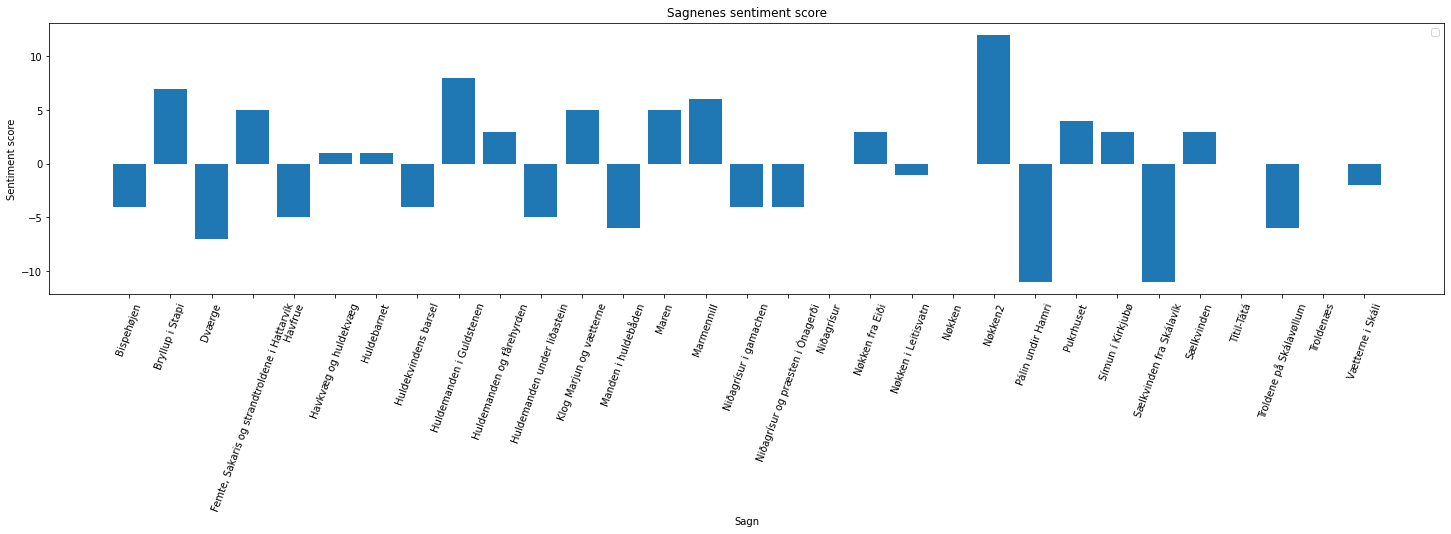

In [128]:
plt.figure(figsize=(25,5))

plt.title("Sagnenes sentiment score")

plt.bar(df_sagn.Titler,df_sagn.Sentiment_score)

plt.ylabel("Sentiment score")
plt.xlabel("Sagn")
plt.xticks(rotation=70)

plt.legend()
plt.savefig("sagn_score.pdf", bbox_inches = "tight", dpi=200)
plt.show()

In [127]:
df_sagn.to_csv('sagn_sentiment.csv', index=False)

0     [Daggryet, Folkesagn, Færøske, Karlen, Oversat...
1     [Brylluppet, Datteren, Datterens, Folkesagn, F...
2     [Antiquarisk, Dværge, Dværgene, Dværgenes, Dvø...
3     [Alle, Barnet, Femte, Folk, Folkesagn, Fugloy,...
4     [/, Antiquarisk, Havfrue, Havfruen, Kongelige,...
5     [Ale, Antiquarisk, Flekka, Folk, Grimen, Haker...
6     [Barnet, Drengen, Huldebarnet, Kvinden, Modere...
7     [Anthologi, Elseba, Færøsk, Huldekvindens, Hul...
8     [Folkesagn, Færøske, Huldemanden, Koens, Overs...
9     [Ejerne, Folkesagn, Færøske, Huldemanden, Huld...
10    [Bonden, Brudens, Folkesagn, Færøske, Huldeman...
11    [ANTHOLOGI, Alle, Alt, Anthologi, Færøsk, Hamm...
12    [Antiquarisk, Bygden, Bådsformanden, Forbandet...
13    [Antiquarisk, Kongelige, Marra, Nordiske, Oldt...
14    [Antiquarisk, Bonden, Elduvík, Kongelige, Nord...
15    [Folkesagn, Færøske, Kort, Oversat, Sagn, Viða...
16    [Folkesagn, Færøske, Historien, Oversat, Præst...
17    [Anthologi, Færøsk, Loddasen, Oversat, Sag

In [134]:
def find_ord(txt):
    x1 = []
    y1 = list(txt.sents)
    for sæt in y1:          #for hver sætning i listen y                 
        for ord in sæt:      #for hvert ord i sætningen
            if ord.pos_ == "ADJ": #finder adjektiver kun
                x1.append(ord.text)
    return sorted(set(x1))        #returnerer sættet sorteret alfabetisk. hvis man sletter set så får man dubletter

In [135]:
df_sagn["adj"] = df_sagn.nlp_Tekst.apply(find_ord)

In [137]:
df_sagn["adj"]

0     [Færøske, bange, gamle, gammel, hele, høj, sam...
1     [Færøske, alle, almindelige, alt, attråværdig,...
2     [Antiquarisk, Kongelige, Nordiske, alt, bedste...
3     [Alle, Femte, Færøske, almindelige, bange, bed...
4     [Antiquarisk, Havfrue, Kongelige, Nordiske, al...
5     [Antiquarisk, Kongelige, Korte, Nordiske, Reig...
6     [alle, bred, eget, forvredet, fremmed, halv, h...
7      [Færøsk, gift, hele, mange, stort, stædig, vred]
8     [Færøske, gamle, glad, ihærdig, lovlig, venlig...
9     [Færøske, bestemt, ene, fede, forrige, nordlig...
10    [Færøske, alle, døde, gamle, gammel, gift, høj...
11    [Alle, Alt, Færøsk, Hammershaimbs, Kloge, alle...
12    [Antiquarisk, Kongelige, Nordiske, alle, fuld,...
13    [Antiquarisk, Kongelige, Marra, Nordiske, alt,...
14    [Antiquarisk, Kongelige, Nordiske, fiks, fri, ...
15    [Færøske, Kort, brat, bær, fattig, gift, niðag...
16    [Færøske, afmagret, berømte, elendig, hele, ly...
17    [Færøsk, lille, mørkebrun, rund, stort, ty

In [138]:
df_sagn["adj_streng"] = df_sagn.Subst_adj.apply(streng)
df_sagn.head(3)

,Titler,Sagn,renTxtOrd,antalOrd,renTxtSæt,antalSæt,antalTegn,ordliste,gnmSætLæng,nlp_Tekst,Subst_adj,Subst_adj_streng,Sentiment_score,adj,adj_streng
0,Bispehøjen,Sagn: Bispehøjen Oversat fra færøsk af Anker ...,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",279,[sagn bispehøjen oversat fra færøsk af anker...,16,1536,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",17.437500,"(Sagn, :, Bispehøjen, , Oversat, fra, færøsk,...","[Daggryet, Folkesagn, Færøske, Karlen, Oversat...",Daggryet Folkesagn Færøske Karlen Oversat Sagn...,-4.0,"[Færøske, bange, gamle, gammel, hele, høj, sam...",Daggryet Folkesagn Færøske Karlen Oversat Sagn...
1,Bryllup i Stapi,Sagn: Brylluppet i Stapi Oversat fra færøsk a...,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",1207,[sagn brylluppet i stapi oversat fra færøsk ...,71,6565,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",17.000000,"(Sagn, :, Brylluppet, i, Stapi, , Oversat, fr...","[Brylluppet, Datteren, Datterens, Folkesagn, F...",Brylluppet Datteren Datterens Folkesagn Færøsk...,7.0,"[Færøske, alle, almindelige, alt, attråværdig,...",Brylluppet Datteren Datterens Folkesagn Færøsk...
2,Dværge,Sagn: Dværge Oversat fra færøsk af Anker Eli ...,"[sagn, dværge, oversat, fra, færøsk, af, anker...",296,[sagn dværge oversat fra færøsk af anker eli...,23,1587,"[sagn, dværge, oversat, fra, færøsk, af, anker...",12.869565,"(Sagn, :, Dværge, , Oversat, fra, færøsk, af,...","[Antiquarisk, Dværge, Dværgene, Dværgenes, Dvø...",Antiquarisk Dværge Dværgene Dværgenes Dvørgar ...,-7.0,"[Antiquarisk, Kongelige, Nordiske, alt, bedste...",Antiquarisk Dværge Dværgene Dværgenes Dvørgar ...


In [142]:
df_sagn["Sentiment_score.kun_adj"] = df_sagn.adj_streng.apply(afinn.score)

In [143]:
df_sagn.head(3)

,Titler,Sagn,renTxtOrd,antalOrd,renTxtSæt,antalSæt,antalTegn,ordliste,gnmSætLæng,nlp_Tekst,Subst_adj,Subst_adj_streng,Sentiment_score,adj,adj_streng,Sentiment_score.kun_adj
0,Bispehøjen,Sagn: Bispehøjen Oversat fra færøsk af Anker ...,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",279,[sagn bispehøjen oversat fra færøsk af anker...,16,1536,"[sagn, bispehøjen, oversat, fra, færøsk, af, a...",17.437500,"(Sagn, :, Bispehøjen, , Oversat, fra, færøsk,...","[Daggryet, Folkesagn, Færøske, Karlen, Oversat...",Daggryet Folkesagn Færøske Karlen Oversat Sagn...,-4.0,"[Færøske, bange, gamle, gammel, hele, høj, sam...",Daggryet Folkesagn Færøske Karlen Oversat Sagn...,-4.0
1,Bryllup i Stapi,Sagn: Brylluppet i Stapi Oversat fra færøsk a...,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",1207,[sagn brylluppet i stapi oversat fra færøsk ...,71,6565,"[sagn, brylluppet, i, stapi, oversat, fra, fær...",17.000000,"(Sagn, :, Brylluppet, i, Stapi, , Oversat, fr...","[Brylluppet, Datteren, Datterens, Folkesagn, F...",Brylluppet Datteren Datterens Folkesagn Færøsk...,7.0,"[Færøske, alle, almindelige, alt, attråværdig,...",Brylluppet Datteren Datterens Folkesagn Færøsk...,7.0
2,Dværge,Sagn: Dværge Oversat fra færøsk af Anker Eli ...,"[sagn, dværge, oversat, fra, færøsk, af, anker...",296,[sagn dværge oversat fra færøsk af anker eli...,23,1587,"[sagn, dværge, oversat, fra, færøsk, af, anker...",12.869565,"(Sagn, :, Dværge, , Oversat, fra, færøsk, af,...","[Antiquarisk, Dværge, Dværgene, Dværgenes, Dvø...",Antiquarisk Dværge Dværgene Dværgenes Dvørgar ...,-7.0,"[Antiquarisk, Kongelige, Nordiske, alt, bedste...",Antiquarisk Dværge Dværgene Dværgenes Dvørgar ...,-7.0


In [ ]:
#laver jeg en fejl her?^^ får den samme sentiment score med subj+adj, som med kun adj? det virker underlidt. 
## regn sentimentscore ud i brøker ift. længden af teksten, for at få brugbare tal i opgaven..